<a href="https://colab.research.google.com/github/Arnab1181412/Health-Insurance-Cross-Sell-Prediction/blob/main/FeatureEng_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

**Importing the Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',index_col=0)
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset,random_state=42)

In [7]:
train = train.sample(frac=0.2,random_state=42)
train.shape

(57166, 11)

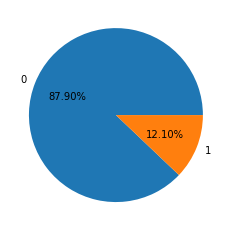

In [8]:
plt.pie(x=train['Response'].value_counts(),labels=['0','1'],autopct='%1.2f%%')
plt.show()

In [9]:
X_train = train.drop('Response',axis=1)
y_train = train.Response

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 6160 to 123453
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                57166 non-null  object 
 1   Age                   57166 non-null  int64  
 2   Driving_License       57166 non-null  int64  
 3   Region_Code           57166 non-null  float64
 4   Previously_Insured    57166 non-null  int64  
 5   Vehicle_Age           57166 non-null  object 
 6   Vehicle_Damage        57166 non-null  object 
 7   Annual_Premium        57166 non-null  float64
 8   Policy_Sales_Channel  57166 non-null  float64
 9   Vintage               57166 non-null  int64  
 10  Response              57166 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 5.2+ MB


Types of Variables

**0 Null values**

**Seperating different type of variables**

In [11]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical_cols

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [12]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [13]:
continuous_numerical_cols = [col for col in numerical_cols if len(X_train[col].unique())>25]
continuous_numerical_cols.remove('Region_Code')
continuous_numerical_cols

['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [14]:
discrete_numerical_cols = [col for col in numerical_cols if col not in continuous_numerical_cols]
discrete_numerical_cols

['Driving_License', 'Region_Code', 'Previously_Insured']

**OHE for Vehicle_Damage**

In [15]:
gender_ohe = pd.get_dummies(X_train['Gender'],drop_first=True)
vehicle_damage_ohe = pd.get_dummies(X_train['Vehicle_Damage'],drop_first=True,prefix='Vehicle_Damage')
X_train.drop(['Gender','Vehicle_Damage'],axis=1,inplace=True)

In [16]:
X_train = pd.concat([X_train,gender_ohe,vehicle_damage_ohe],axis=1)
X_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
id,,,,,,,,,,
6160,23,1,8.0,1,1-2 Year,2630.0,157.0,111,0,1
308782,67,1,28.0,0,1-2 Year,45404.0,154.0,45,1,1
280681,23,1,46.0,1,< 1 Year,18538.0,152.0,174,0,0
94791,22,1,13.0,0,< 1 Year,24082.0,152.0,87,1,1
261252,63,1,28.0,1,1-2 Year,35593.0,26.0,28,1,0


**Manual Label Encoding for Vehicle_Age column (For ref :- See the EDA notebook)**

In [17]:
for i,j in enumerate(X_train['Vehicle_Age'].unique().tolist()[::-1]):
    X_train['Vehicle_Age'] = np.where(X_train['Vehicle_Age']==j,i+1,X_train['Vehicle_Age'])

In [18]:
X_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
id,,,,,,,,,,
6160,23,1,8.0,1,3,2630.0,157.0,111,0,1
308782,67,1,28.0,0,3,45404.0,154.0,45,1,1
280681,23,1,46.0,1,2,18538.0,152.0,174,0,0
94791,22,1,13.0,0,2,24082.0,152.0,87,1,1
261252,63,1,28.0,1,3,35593.0,26.0,28,1,0


**Handling the Imbalanced dataset**

In [19]:
from  imblearn.combine import SMOTETomek
os = SMOTETomek(random_state=0)
X_os,y_os = os.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [20]:
X_train = pd.DataFrame(X_os,columns = X_train.columns)
y_train = pd.DataFrame(y_os)

In [21]:
X_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
0,23.0,1.0,8.0,1.0,3.0,2630.0,157.0,111.0,0.0,1.0
1,67.0,1.0,28.0,0.0,3.0,45404.0,154.0,45.0,1.0,1.0
2,23.0,1.0,46.0,1.0,2.0,18538.0,152.0,174.0,0.0,0.0
3,22.0,1.0,13.0,0.0,2.0,24082.0,152.0,87.0,1.0,1.0
4,63.0,1.0,28.0,1.0,3.0,35593.0,26.0,28.0,1.0,0.0


In [22]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(0)
var_thres.fit(X_train)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

**Creating New feautures using Deep Feature Synthesis (DFS)**

In [23]:
es = ft.EntitySet(id = 'health')
es.entity_from_dataframe(entity_id = 'hr', dataframe = X_train, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'hr',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'], 
                                      verbose=True)

/content/drive/MyDrive/Colab Notebooks/featuretools/entityset/entity.py:463: UserWarning: index index not found in dataframe, creating new integer column
  "integer column".format(index))


Built 100 features
Elapsed: 00:00 | Progress:   0%|          

/content/drive/MyDrive/Colab Notebooks/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


Elapsed: 00:00 | Progress: 100%|██████████


**Getting the columns whose corelation is less**

In [ ]:
def correlation(df,threshold):
    data = df.copy()
    corr_columns = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                corr_columns.add(corr.columns[i])
            
    return corr_columns

In [ ]:
imp_columns = correlation(feature_matrix.copy(),0.85)
imp_columns

{'Age * Driving_License',
 'Age * Male',
 'Age * Policy_Sales_Channel',
 'Age * Previously_Insured',
 'Age * Region_Code',
 'Age * Vehicle_Age',
 'Age * Vehicle_Damage_Yes',
 'Age * Vintage',
 'Age + Annual_Premium',
 'Age + Driving_License',
 'Age + Male',
 'Age + Policy_Sales_Channel',
 'Age + Previously_Insured',
 'Age + Vehicle_Age',
 'Age + Vehicle_Damage_Yes',
 'Age + Vintage',
 'Annual_Premium * Driving_License',
 'Annual_Premium * Previously_Insured',
 'Annual_Premium * Vehicle_Age',
 'Annual_Premium + Driving_License',
 'Annual_Premium + Male',
 'Annual_Premium + Policy_Sales_Channel',
 'Annual_Premium + Previously_Insured',
 'Annual_Premium + Region_Code',
 'Annual_Premium + Vehicle_Age',
 'Annual_Premium + Vehicle_Damage_Yes',
 'Annual_Premium + Vintage',
 'Driving_License * Male',
 'Driving_License * Policy_Sales_Channel',
 'Driving_License * Previously_Insured',
 'Driving_License * Region_Code',
 'Driving_License * Vehicle_Age',
 'Driving_License * Vehicle_Damage_Yes',
 'D

In [ ]:
len(imp_columns)

66

In [ ]:
X_train  = feature_matrix[imp_columns]
X_train.head()

,Policy_Sales_Channel + Vehicle_Age,Age + Driving_License,Male + Vintage,Vehicle_Age + Vintage,Region_Code * Vehicle_Age,Policy_Sales_Channel + Region_Code,Policy_Sales_Channel * Previously_Insured,Previously_Insured + Region_Code,Driving_License + Region_Code,Age * Vintage,Vehicle_Damage_Yes,Annual_Premium + Driving_License,Driving_License * Vintage,Previously_Insured * Vehicle_Age,Annual_Premium + Previously_Insured,Region_Code + Vintage,Male + Region_Code,Age + Annual_Premium,Annual_Premium + Vehicle_Damage_Yes,Driving_License + Vehicle_Age,Driving_License + Policy_Sales_Channel,Policy_Sales_Channel + Previously_Insured,Male * Vehicle_Damage_Yes,Annual_Premium + Vehicle_Age,Age * Previously_Insured,Annual_Premium + Policy_Sales_Channel,Age * Vehicle_Damage_Yes,Male * Vehicle_Age,Vehicle_Age * Vintage,Age + Previously_Insured,Age * Region_Code,Age * Driving_License,Annual_Premium + Region_Code,Driving_License + Previously_Insured,Policy_Sales_Channel * Vintage,Age + Policy_Sales_Channel,Age + Vehicle_Damage_Yes,Annual_Premium + Vintage,Age * Male,Annual_Premium * Driving_License,Driving_License * Previously_Insured,Vehicle_Damage_Yes + Vintage,Vehicle_Age * Vehicle_Damage_Yes,Driving_License + Vehicle_Damage_Yes,Driving_License * Policy_Sales_Channel,Previously_Insured + Vintage,Driving_License * Vehicle_Damage_Yes,Driving_License * Region_Code,Driving_License * Male,Policy_Sales_Channel * Vehicle_Age,Driving_License * Vehicle_Age,Driving_License + Vintage,Driving_License + Male,Annual_Premium * Previously_Insured,Age + Male,Age * Policy_Sales_Channel,Annual_Premium * Vehicle_Age,Annual_Premium + Male,Region_Code + Vehicle_Age,Male + Policy_Sales_Channel,Previously_Insured * Region_Code,Age + Vehicle_Age,Age + Vintage,Region_Code + Vehicle_Damage_Yes,Age * Vehicle_Age,Policy_Sales_Channel + Vehicle_Damage_Yes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,160.0,24.0,111.0,114.0,24.0,165.0,157.0,9.0,9.0,2553.0,1.0,2631.0,111.0,3.0,2631.0,119.0,8.0,2653.0,2631.0,4.0,158.0,158.0,0.0,2633.0,23.0,2787.0,23.0,0.0,333.0,24.0,184.0,23.0,2638.0,2.0,17427.0,180.0,24.0,2741.0,0.0,2630.0,1.0,112.0,3.0,2.0,157.0,112.0,1.0,8.0,0.0,471.0,3.0,112.0,1.0,2630.0,23.0,3611.0,7890.0,2630.0,11.0,157.0,8.0,26.0,134.0,9.0,69.0,158.0
1,157.0,68.0,46.0,48.0,84.0,182.0,0.0,28.0,29.0,3015.0,1.0,45405.0,45.0,0.0,45404.0,73.0,29.0,45471.0,45405.0,4.0,155.0,154.0,1.0,45407.0,0.0,45558.0,67.0,3.0,135.0,67.0,1876.0,67.0,45432.0,1.0,6930.0,221.0,68.0,45449.0,67.0,45404.0,0.0,46.0,3.0,2.0,154.0,45.0,1.0,28.0,1.0,462.0,3.0,46.0,2.0,0.0,68.0,10318.0,136212.0,45405.0,31.0,155.0,0.0,70.0,112.0,29.0,201.0,155.0
2,154.0,24.0,174.0,176.0,92.0,198.0,152.0,47.0,47.0,4002.0,0.0,18539.0,174.0,2.0,18539.0,220.0,46.0,18561.0,18538.0,3.0,153.0,153.0,0.0,18540.0,23.0,18690.0,0.0,0.0,348.0,24.0,1058.0,23.0,18584.0,2.0,26448.0,175.0,23.0,18712.0,0.0,18538.0,1.0,174.0,0.0,1.0,152.0,175.0,0.0,46.0,0.0,304.0,2.0,175.0,1.0,18538.0,23.0,3496.0,37076.0,18538.0,48.0,152.0,46.0,25.0,197.0,46.0,46.0,152.0
3,154.0,23.0,88.0,89.0,26.0,165.0,0.0,13.0,14.0,1914.0,1.0,24083.0,87.0,0.0,24082.0,100.0,14.0,24104.0,24083.0,3.0,153.0,152.0,1.0,24084.0,0.0,24234.0,22.0,2.0,174.0,22.0,286.0,22.0,24095.0,1.0,13224.0,174.0,23.0,24169.0,22.0,24082.0,0.0,88.0,2.0,2.0,152.0,87.0,1.0,13.0,1.0,304.0,2.0,88.0,2.0,0.0,23.0,3344.0,48164.0,24083.0,15.0,153.0,0.0,24.0,109.0,14.0,44.0,153.0
4,29.0,64.0,29.0,31.0,84.0,54.0,26.0,29.0,29.0,1764.0,0.0,35594.0,28.0,3.0,35594.0,56.0,29.0,35656.0,35593.0,4.0,27.0,27.0,0.0,35596.0,63.0,35619.0,0.0,3.0,84.0,64.0,1764.0,63.0,35621.0,2.0,728.0,89.0,63.0,35621.0,63.0,35593.0,1.0,28.0,0.0,1.0,26.0,29.0,0.0,28.0,1.0,78.0,3.0,29.0,2.0,35593.0,64.0,1638.0,106779.0,35594.0,31.0,27.0,28.0,66.0,91.0,28.0,189.0,26.0


In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
best_features = SelectKBest(mutual_info_classif,k=40)
best_features.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=40, score_func=<function mutual_info_classif at 0x7fe213190ef0>)

In [ ]:
X_train.columns[best_features.get_support()]

Index(['Policy_Sales_Channel + Vehicle_Age', 'Age + Driving_License',
       'Male + Vintage', 'Vehicle_Age + Vintage', 'Region_Code * Vehicle_Age',
       'Policy_Sales_Channel + Region_Code',
       'Previously_Insured + Region_Code', 'Driving_License + Region_Code',
       'Age * Vintage', 'Driving_License * Vintage', 'Region_Code + Vintage',
       'Male + Region_Code', 'Driving_License + Policy_Sales_Channel',
       'Policy_Sales_Channel + Previously_Insured', 'Age * Vehicle_Damage_Yes',
       'Male * Vehicle_Age', 'Vehicle_Age * Vintage',
       'Age + Previously_Insured', 'Age * Region_Code',
       'Age * Driving_License', 'Policy_Sales_Channel * Vintage',
       'Age + Policy_Sales_Channel', 'Age + Vehicle_Damage_Yes', 'Age * Male',
       'Vehicle_Damage_Yes + Vintage', 'Vehicle_Age * Vehicle_Damage_Yes',
       'Driving_License * Policy_Sales_Channel',
       'Previously_Insured + Vintage', 'Driving_License * Region_Code',
       'Policy_Sales_Channel * Vehicle_Age', 'Driv

In [ ]:
X_train = X_train[X_train.columns[best_features.get_support()]]
X_train.head()

,Policy_Sales_Channel + Vehicle_Age,Age + Driving_License,Male + Vintage,Vehicle_Age + Vintage,Region_Code * Vehicle_Age,Policy_Sales_Channel + Region_Code,Previously_Insured + Region_Code,Driving_License + Region_Code,Age * Vintage,Driving_License * Vintage,Region_Code + Vintage,Male + Region_Code,Driving_License + Policy_Sales_Channel,Policy_Sales_Channel + Previously_Insured,Age * Vehicle_Damage_Yes,Male * Vehicle_Age,Vehicle_Age * Vintage,Age + Previously_Insured,Age * Region_Code,Age * Driving_License,Policy_Sales_Channel * Vintage,Age + Policy_Sales_Channel,Age + Vehicle_Damage_Yes,Age * Male,Vehicle_Damage_Yes + Vintage,Vehicle_Age * Vehicle_Damage_Yes,Driving_License * Policy_Sales_Channel,Previously_Insured + Vintage,Driving_License * Region_Code,Policy_Sales_Channel * Vehicle_Age,Driving_License + Vintage,Age + Male,Age * Policy_Sales_Channel,Region_Code + Vehicle_Age,Male + Policy_Sales_Channel,Age + Vehicle_Age,Age + Vintage,Region_Code + Vehicle_Damage_Yes,Age * Vehicle_Age,Policy_Sales_Channel + Vehicle_Damage_Yes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,160.0,24.0,111.0,114.0,24.0,165.0,9.0,9.0,2553.0,111.0,119.0,8.0,158.0,158.0,23.0,0.0,333.0,24.0,184.0,23.0,17427.0,180.0,24.0,0.0,112.0,3.0,157.0,112.0,8.0,471.0,112.0,23.0,3611.0,11.0,157.0,26.0,134.0,9.0,69.0,158.0
1,157.0,68.0,46.0,48.0,84.0,182.0,28.0,29.0,3015.0,45.0,73.0,29.0,155.0,154.0,67.0,3.0,135.0,67.0,1876.0,67.0,6930.0,221.0,68.0,67.0,46.0,3.0,154.0,45.0,28.0,462.0,46.0,68.0,10318.0,31.0,155.0,70.0,112.0,29.0,201.0,155.0
2,154.0,24.0,174.0,176.0,92.0,198.0,47.0,47.0,4002.0,174.0,220.0,46.0,153.0,153.0,0.0,0.0,348.0,24.0,1058.0,23.0,26448.0,175.0,23.0,0.0,174.0,0.0,152.0,175.0,46.0,304.0,175.0,23.0,3496.0,48.0,152.0,25.0,197.0,46.0,46.0,152.0
3,154.0,23.0,88.0,89.0,26.0,165.0,13.0,14.0,1914.0,87.0,100.0,14.0,153.0,152.0,22.0,2.0,174.0,22.0,286.0,22.0,13224.0,174.0,23.0,22.0,88.0,2.0,152.0,87.0,13.0,304.0,88.0,23.0,3344.0,15.0,153.0,24.0,109.0,14.0,44.0,153.0
4,29.0,64.0,29.0,31.0,84.0,54.0,29.0,29.0,1764.0,28.0,56.0,29.0,27.0,27.0,0.0,3.0,84.0,64.0,1764.0,63.0,728.0,89.0,63.0,63.0,28.0,0.0,26.0,29.0,28.0,78.0,29.0,64.0,1638.0,31.0,27.0,66.0,91.0,28.0,189.0,26.0


**For X_valid**

In [24]:
X_valid = test.drop('Response',axis=1)
y_valid = test['Response']

In [25]:
gender_ohe = pd.get_dummies(X_valid['Gender'],drop_first=True)
vehicle_damage_ohe = pd.get_dummies(X_valid['Vehicle_Damage'],drop_first=True,prefix='Vehicle_Damage')
X_valid.drop(['Gender','Vehicle_Damage'],axis=1,inplace=True)

In [26]:
X_valid = pd.concat([X_valid,gender_ohe,vehicle_damage_ohe],axis=1)
X_valid.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
id,,,,,,,,,,
200223,21,1,3.0,1,< 1 Year,20408.0,160.0,72,0,0
49767,55,1,15.0,0,1-2 Year,37498.0,26.0,102,1,1
172202,41,1,3.0,0,1-2 Year,2630.0,26.0,90,0,1
160714,26,1,11.0,0,< 1 Year,2630.0,151.0,268,0,0
53273,51,1,40.0,0,1-2 Year,34006.0,124.0,265,1,1


**Manual Label Encoding for Vehicle_Age column (For ref :- See the EDA notebook)**

In [27]:
for i,j in enumerate(X_valid['Vehicle_Age'].unique().tolist()[::-1]):
    X_valid['Vehicle_Age'] = np.where(X_valid['Vehicle_Age']==j,i+1,X_valid['Vehicle_Age'])

In [28]:
X_valid.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
id,,,,,,,,,,
200223,21,1,3.0,1,3,20408.0,160.0,72,0,0
49767,55,1,15.0,0,2,37498.0,26.0,102,1,1
172202,41,1,3.0,0,2,2630.0,26.0,90,0,1
160714,26,1,11.0,0,3,2630.0,151.0,268,0,0
53273,51,1,40.0,0,2,34006.0,124.0,265,1,1


In [29]:
from  imblearn.combine import SMOTETomek
os = SMOTETomek(random_state=0)
X_os_test,y_os_test = os.fit_resample(X_valid,y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
X_valid = pd.DataFrame(X_os_test,columns = X_valid.columns)
y_valid = pd.DataFrame(y_os_test)

In [31]:
es_valid = ft.EntitySet(id = 'health_test')
es_valid.entity_from_dataframe(entity_id = 'health', dataframe = X_valid, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix_test, feature_defs_test = ft.dfs(entityset = es_valid, target_entity = 'health',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'], 
                                      verbose=True)

Built 100 features
Elapsed: 00:00 | Progress:   0%|          

/content/drive/MyDrive/Colab Notebooks/featuretools/entityset/entity.py:463: UserWarning: index index not found in dataframe, creating new integer column
  "integer column".format(index))
/content/drive/MyDrive/Colab Notebooks/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


Elapsed: 00:00 | Progress: 100%|██████████


In [36]:
feature_matrix_test.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes,Age + Annual_Premium,Age + Driving_License,Age + Male,Age + Policy_Sales_Channel,Age + Previously_Insured,Age + Region_Code,Age + Vehicle_Age,Age + Vehicle_Damage_Yes,Age + Vintage,Annual_Premium + Driving_License,Annual_Premium + Male,Annual_Premium + Policy_Sales_Channel,Annual_Premium + Previously_Insured,Annual_Premium + Region_Code,Annual_Premium + Vehicle_Age,Annual_Premium + Vehicle_Damage_Yes,Annual_Premium + Vintage,Driving_License + Male,Driving_License + Policy_Sales_Channel,Driving_License + Previously_Insured,Driving_License + Region_Code,Driving_License + Vehicle_Age,Driving_License + Vehicle_Damage_Yes,Driving_License + Vintage,Male + Policy_Sales_Channel,Male + Previously_Insured,Male + Region_Code,Male + Vehicle_Age,Male + Vehicle_Damage_Yes,Male + Vintage,Policy_Sales_Channel + Previously_Insured,Policy_Sales_Channel + Region_Code,Policy_Sales_Channel + Vehicle_Age,Policy_Sales_Channel + Vehicle_Damage_Yes,Policy_Sales_Channel + Vintage,Previously_Insured + Region_Code,Previously_Insured + Vehicle_Age,Previously_Insured + Vehicle_Damage_Yes,Previously_Insured + Vintage,Region_Code + Vehicle_Age,Region_Code + Vehicle_Damage_Yes,Region_Code + Vintage,Vehicle_Age + Vehicle_Damage_Yes,Vehicle_Age + Vintage,Vehicle_Damage_Yes + Vintage,Age * Annual_Premium,Age * Driving_License,Age * Male,Age * Policy_Sales_Channel,Age * Previously_Insured,Age * Region_Code,Age * Vehicle_Age,Age * Vehicle_Damage_Yes,Age * Vintage,Annual_Premium * Driving_License,Annual_Premium * Male,Annual_Premium * Policy_Sales_Channel,Annual_Premium * Previously_Insured,Annual_Premium * Region_Code,Annual_Premium * Vehicle_Age,Annual_Premium * Vehicle_Damage_Yes,Annual_Premium * Vintage,Driving_License * Male,Driving_License * Policy_Sales_Channel,Driving_License * Previously_Insured,Driving_License * Region_Code,Driving_License * Vehicle_Age,Driving_License * Vehicle_Damage_Yes,Driving_License * Vintage,Male * Policy_Sales_Channel,Male * Previously_Insured,Male * Region_Code,Male * Vehicle_Age,Male * Vehicle_Damage_Yes,Male * Vintage,Policy_Sales_Channel * Previously_Insured,Policy_Sales_Channel * Region_Code,Policy_Sales_Channel * Vehicle_Age,Policy_Sales_Channel * Vehicle_Damage_Yes,Policy_Sales_Channel * Vintage,Previously_Insured * Region_Code,Previously_Insured * Vehicle_Age,Previously_Insured * Vehicle_Damage_Yes,Previously_Insured * Vintage,Region_Code * Vehicle_Age,Region_Code * Vehicle_Damage_Yes,Region_Code * Vintage,Vehicle_Age * Vehicle_Damage_Yes,Vehicle_Age * Vintage,Vehicle_Damage_Yes * Vintage
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21.0,1.0,3.0,1.0,3.0,20408.0,160.0,72.0,0.0,0.0,20429.0,22.0,21.0,181.0,22.0,24.0,24.0,21.0,93.0,20409.0,20408.0,20568.0,20409.0,20411.0,20411.0,20408.0,20480.0,1.0,161.0,2.0,4.0,4.0,1.0,73.0,160.0,1.0,3.0,3.0,0.0,72.0,161.0,163.0,163.0,160.0,232.0,4.0,4.0,1.0,73.0,6.0,3.0,75.0,3.0,75.0,72.0,428568.0,21.0,0.0,3360.0,21.0,63.0,63.0,0.0,1512.0,20408.0,0.0,3265280.0,20408.0,61224.0,61224.0,0.0,1469376.0,0.0,160.0,1.0,3.0,3.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,480.0,480.0,0.0,11520.0,3.0,3.0,0.0,72.0,9.0,0.0,216.0,0.0,216.0,0.0
1,55.0,1.0,15.0,0.0,2.0,37498.0,26.0,102.0,1.0,1.0,37553.0,56.0,56.0,81.0,55.0,70.0,57.0,56.0,157.0,37499.0,37499.0,37524.0,37498.0,37513.0,37500.0,37499.0,37600.0,2.0,27.0,1.0,16.0,3.0,2.0,103.0,27.0,1.0,16.0,3.0,2.0,103.0,26.0,41.0,28.0,27.0,128.0,15.0,2.0,1.0,102.0,17.0,16.0,117.0,3.0,104.0,103.0,2062390.0,55.0,55.0,1430.0,0.0,825.0,110.0,55.0,5610.0,37498.0,37498.0,974948.0,0.0,562470.0,74996.0,37498.0,3824796.0,1.0,26.0,0.0,15.0,2.0,1.0,102.0,26.0,0.0,15.0,2.0,1.0,102.0,0.0,390.0,52.0,26.0,2652.0,0.0,0.0,0.0,0.0,30.0,15.0,1530.0,2.0,204.0,102.0
2,41.0,1.0,3.0,0.0,2.0,2630.0,26.0,90.0,0.0,1.0,2671.0,42.0,41.0,67.0,41.0,44.0,43.0,42.0,131.0,2631.0,2630.0,2656.0,2630.0,2633.0,2

In [ ]:
X_valid = feature_matrix_test[X_train.columns]

**Using cross validation to see which model will perform best**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import  XGBClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def modelpicker(models):
  summary = {}
  for i in models:
    accuracy = cross_val_score(i,X_train,y_train,scoring='accuracy',cv=5,n_jobs=-1).mean()
    summary[str(i)] = accuracy
    print('/n',str(i),' : ',accuracy)
  return summary


In [ ]:
models = [RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier(),DecisionTreeClassifier(),CatBoostClassifier(task_type='GPU',iterations=1000),GaussianNB(),KNeighborsClassifier()]
model_acc = modelpicker(models)

/n RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  :  0.8882386569015617
/n AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)  :  0.8434625263740552
/n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n

**Catboost has highest training accuracy ie; 0.8910797627393847**

**HyperParameter Tuning**

In [ ]:
clf_temp = CatBoostClassifier(iterations=10,learning_rate=0.2,min_child_samples = 3,
                              depth = 3,bagging_temperature = 0.5,l2_leaf_reg=10,
                              random_strength=0.6)

In [ ]:
cross_val_score(clf_temp,X_train,y_train,n_jobs=-1,cv = 5,scoring='accuracy').mean()

0.8361334209415885

In [ ]:
import optuna
from catboost import CatBoostClassifier
def objective(trial):
  
  learning_rate = trial.suggest_float('learning_rate',0.1,0.6,step = 0.1)
  depth = trial.suggest_int('depth',2,10,1)
  min_child_samples = trial.suggest_int('min_child_samples',1,7,2) 
  bagging_temperature = trial.suggest_float('bagging_temperature',0.1,2,step = 0.1)
  l2_leaf_reg = trial.suggest_float('l2_leaf_reg',2,30,step = 2)
  iterations = trial.suggest_int('iterations',750,2000,100)
  random_strength = trial.suggest_float('random_strength',0.1,0.6,step=0.2)
  clf = CatBoostClassifier(iterations=iterations,learning_rate=learning_rate,
                      depth = depth,min_child_samples = min_child_samples,
                      bagging_temperature = bagging_temperature,l2_leaf_reg = l2_leaf_reg,
                      random_strength=random_strength,task_type="GPU")
  return cross_val_score(clf,X_train,y_train,n_jobs=-1,cv = 3).mean()
  

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials = 100)

[I 2021-07-08 16:01:02,816] A new study created in memory with name: no-name-d4f7950a-6eab-4083-a2bc-11721d13aeff
[I 2021-07-08 16:01:49,263] Trial 0 finished with value: 0.8908926218708828 and parameters: {'learning_rate': 0.5, 'depth': 8, 'min_child_samples': 5, 'bagging_temperature': 1.8000000000000003, 'l2_leaf_reg': 16.0, 'iterations': 1150, 'random_strength': 0.30000000000000004}. Best is trial 0 with value: 0.8908926218708828.
[I 2021-07-08 16:02:19,599] Trial 1 finished with value: 0.8936820652173912 and parameters: {'learning_rate': 0.1, 'depth': 4, 'min_child_samples': 5, 'bagging_temperature': 1.0, 'l2_leaf_reg': 24.0, 'iterations': 1450, 'random_strength': 0.30000000000000004}. Best is trial 1 with value: 0.8936820652173912.
[I 2021-07-08 16:02:58,139] Trial 2 finished with value: 0.8990036231884059 and parameters: {'learning_rate': 0.2, 'depth': 4, 'min_child_samples': 7, 'bagging_temperature': 0.9, 'l2_leaf_reg': 28.0, 'iterations': 1950, 'random_strength': 0.5}. Best is 

In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9047060276679842
Best hyperparameters: {'learning_rate': 0.4, 'depth': 2, 'min_child_samples': 3, 'bagging_temperature': 0.1, 'l2_leaf_reg': 2.0, 'iterations': 1650, 'random_strength': 0.5}


**Now we will fit the whole training dataset**

In [ ]:
full_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',index_col=0)

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(full_dataset,random_state=42)

In [ ]:
X_train = train.drop('Response',axis=1)
y_train = train.Response

In [ ]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical_cols

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [ ]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
continuous_numerical_cols = [col for col in numerical_cols if len(X_train[col].unique())>25]
continuous_numerical_cols.remove('Region_Code')
continuous_numerical_cols

['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [ ]:
discrete_numerical_cols = [col for col in numerical_cols if col not in continuous_numerical_cols]
discrete_numerical_cols

['Driving_License', 'Region_Code', 'Previously_Insured']

In [ ]:
gender_ohe = pd.get_dummies(X_train['Gender'],drop_first=True)
vehicle_damage_ohe = pd.get_dummies(X_train['Vehicle_Damage'],drop_first=True,prefix='Vehicle_Damage')
X_train.drop(['Gender','Vehicle_Damage'],axis=1,inplace=True)


In [ ]:
X_train = pd.concat([X_train,gender_ohe,vehicle_damage_ohe],axis=1)
X_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage_Yes
id,,,,,,,,,,
247289,21,1,46.0,1,< 1 Year,24534.0,152.0,202,1,0
88243,75,1,28.0,1,1-2 Year,251853.0,124.0,85,0,1
312679,51,1,28.0,0,1-2 Year,69601.0,124.0,153,1,1
218265,22,1,29.0,1,< 1 Year,39573.0,152.0,44,1,0
88839,23,1,21.0,1,< 1 Year,27423.0,152.0,208,1,0


In [ ]:
for i,j in enumerate(X_train['Vehicle_Age'].unique().tolist()[::-1]):
    X_train['Vehicle_Age'] = np.where(X_train['Vehicle_Age']==j,i+1,X_train['Vehicle_Age'])

In [ ]:
from  imblearn.combine import SMOTETomek
os = SMOTETomek(random_state=33)
X_os_f,y_os_f = os.fit_resample(X_train,y_train)

In [ ]:
X_os_f = pd.DataFrame(X_os_f,columns = X_train.columns)
y_os_f = pd.DataFrame(y_os_f)

In [ ]:
es = ft.EntitySet(id = 'health_full')
es.entity_from_dataframe(entity_id = 'hr_full', dataframe = X_os_f, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix_full, feature_defs_full = ft.dfs(entityset = es, target_entity = 'hr_full',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'], 
                                      verbose=True)

Built 100 features
Elapsed: 00:03 | Progress: 100%|██████████


In [ ]:
X_train  = feature_matrix_full[imp_columns]
X_train.head()

,Policy_Sales_Channel + Vehicle_Age,Age + Driving_License,Male + Vintage,Vehicle_Age + Vintage,Region_Code * Vehicle_Age,Policy_Sales_Channel + Region_Code,Policy_Sales_Channel * Previously_Insured,Previously_Insured + Region_Code,Driving_License + Region_Code,Age * Vintage,Vehicle_Damage_Yes,Annual_Premium + Driving_License,Driving_License * Vintage,Previously_Insured * Vehicle_Age,Annual_Premium + Previously_Insured,Region_Code + Vintage,Male + Region_Code,Age + Annual_Premium,Annual_Premium + Vehicle_Damage_Yes,Driving_License + Vehicle_Age,Driving_License + Policy_Sales_Channel,Policy_Sales_Channel + Previously_Insured,Male * Vehicle_Damage_Yes,Annual_Premium + Vehicle_Age,Age * Previously_Insured,Annual_Premium + Policy_Sales_Channel,Age * Vehicle_Damage_Yes,Male * Vehicle_Age,Vehicle_Age * Vintage,Age + Previously_Insured,Age * Region_Code,Age * Driving_License,Annual_Premium + Region_Code,Driving_License + Previously_Insured,Policy_Sales_Channel * Vintage,Age + Policy_Sales_Channel,Age + Vehicle_Damage_Yes,Annual_Premium + Vintage,Age * Male,Annual_Premium * Driving_License,Driving_License * Previously_Insured,Vehicle_Damage_Yes + Vintage,Vehicle_Age * Vehicle_Damage_Yes,Driving_License + Vehicle_Damage_Yes,Driving_License * Policy_Sales_Channel,Previously_Insured + Vintage,Driving_License * Vehicle_Damage_Yes,Driving_License * Region_Code,Driving_License * Male,Policy_Sales_Channel * Vehicle_Age,Driving_License * Vehicle_Age,Driving_License + Vintage,Driving_License + Male,Annual_Premium * Previously_Insured,Age + Male,Age * Policy_Sales_Channel,Annual_Premium * Vehicle_Age,Annual_Premium + Male,Region_Code + Vehicle_Age,Male + Policy_Sales_Channel,Previously_Insured * Region_Code,Age + Vehicle_Age,Age + Vintage,Region_Code + Vehicle_Damage_Yes,Age * Vehicle_Age,Policy_Sales_Channel + Vehicle_Damage_Yes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,155.0,22.0,203.0,205.0,138.0,198.0,152.0,47.0,47.0,4242.0,0.0,24535.0,202.0,3.0,24535.0,248.0,47.0,24555.0,24534.0,4.0,153.0,153.0,0.0,24537.0,21.0,24686.0,0.0,3.0,606.0,22.0,966.0,21.0,24580.0,2.0,30704.0,173.0,21.0,24736.0,21.0,24534.0,1.0,202.0,0.0,1.0,152.0,203.0,0.0,46.0,1.0,456.0,3.0,203.0,2.0,24534.0,22.0,3192.0,73602.0,24535.0,49.0,153.0,46.0,24.0,223.0,46.0,63.0,152.0
1,126.0,76.0,85.0,87.0,56.0,152.0,124.0,29.0,29.0,6375.0,1.0,251854.0,85.0,2.0,251854.0,113.0,28.0,251928.0,251854.0,3.0,125.0,125.0,0.0,251855.0,75.0,251977.0,75.0,0.0,170.0,76.0,2100.0,75.0,251881.0,2.0,10540.0,199.0,76.0,251938.0,0.0,251853.0,1.0,86.0,2.0,2.0,124.0,86.0,1.0,28.0,0.0,248.0,2.0,86.0,1.0,251853.0,75.0,9300.0,503706.0,251853.0,30.0,124.0,28.0,77.0,160.0,29.0,150.0,125.0
2,155.0,23.0,45.0,47.0,87.0,181.0,152.0,30.0,30.0,968.0,0.0,39574.0,44.0,3.0,39574.0,73.0,30.0,39595.0,39573.0,4.0,153.0,153.0,0.0,39576.0,22.0,39725.0,0.0,3.0,132.0,23.0,638.0,22.0,39602.0,2.0,6688.0,174.0,22.0,39617.0,22.0,39573.0,1.0,44.0,0.0,1.0,152.0,45.0,0.0,29.0,1.0,456.0,3.0,45.0,2.0,39573.0,23.0,3344.0,118719.0,39574.0,32.0,153.0,29.0,25.0,66.0,29.0,66.0,152.0
3,155.0,24.0,209.0,211.0,63.0,173.0,152.0,22.0,22.0,4784.0,0.0,27424.0,208.0,3.0,27424.0,229.0,22.0,27446.0,27423.0,4.0,153.0,153.0,0.0,27426.0,23.0,27575.0,0.0,3.0,624.0,24.0,483.0,23.0,27444.0,2.0,31616.0,175.0,23.0,27631.0,23.0,27423.0,1.0,208.0,0.0,1.0,152.0,209.0,0.0,21.0,1.0,456.0,3.0,209.0,2.0,27423.0,24.0,3496.0,82269.0,27424.0,24.0,153.0,21.0,26.0,231.0,21.0,69.0,152.0
4,28.0,60.0,32.0,34.0,56.0,54.0,0.0,28.0,29.0,1888.0,1.0,50331.0,32.0,0.0,50330.0,60.0,28.0,50389.0,50331.0,3.0,27.0,26.0,0.0,50332.0,0.0,50356.0,59.0,0.0,64.0,59.0,1652.0,59.0,50358.0,1.0,832.0,85.0,60.0,50362.0,0.0,50330.0,0.0,33.0,2.0,2.0,26.0,32.0,1.0,28.0,0.0,52.0,2.0,33.0,1.0,0.0,59.0,1534.0,100660.0,50330.0,30.0,26.0,0.0,61.0,91.0,29.0,118.0,27.0


In [ ]:
X_train = X_train[X_train.columns[best_features.get_support()]]
X_train.head()

,Policy_Sales_Channel + Vehicle_Age,Age + Driving_License,Male + Vintage,Vehicle_Age + Vintage,Region_Code * Vehicle_Age,Policy_Sales_Channel + Region_Code,Previously_Insured + Region_Code,Driving_License + Region_Code,Age * Vintage,Driving_License * Vintage,Region_Code + Vintage,Male + Region_Code,Driving_License + Policy_Sales_Channel,Policy_Sales_Channel + Previously_Insured,Age * Vehicle_Damage_Yes,Male * Vehicle_Age,Vehicle_Age * Vintage,Age + Previously_Insured,Age * Region_Code,Age * Driving_License,Policy_Sales_Channel * Vintage,Age + Policy_Sales_Channel,Age + Vehicle_Damage_Yes,Age * Male,Vehicle_Damage_Yes + Vintage,Vehicle_Age * Vehicle_Damage_Yes,Driving_License * Policy_Sales_Channel,Previously_Insured + Vintage,Driving_License * Region_Code,Policy_Sales_Channel * Vehicle_Age,Driving_License + Vintage,Age + Male,Age * Policy_Sales_Channel,Region_Code + Vehicle_Age,Male + Policy_Sales_Channel,Age + Vehicle_Age,Age + Vintage,Region_Code + Vehicle_Damage_Yes,Age * Vehicle_Age,Policy_Sales_Channel + Vehicle_Damage_Yes
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,155.0,22.0,203.0,205.0,138.0,198.0,47.0,47.0,4242.0,202.0,248.0,47.0,153.0,153.0,0.0,3.0,606.0,22.0,966.0,21.0,30704.0,173.0,21.0,21.0,202.0,0.0,152.0,203.0,46.0,456.0,203.0,22.0,3192.0,49.0,153.0,24.0,223.0,46.0,63.0,152.0
1,126.0,76.0,85.0,87.0,56.0,152.0,29.0,29.0,6375.0,85.0,113.0,28.0,125.0,125.0,75.0,0.0,170.0,76.0,2100.0,75.0,10540.0,199.0,76.0,0.0,86.0,2.0,124.0,86.0,28.0,248.0,86.0,75.0,9300.0,30.0,124.0,77.0,160.0,29.0,150.0,125.0
2,155.0,23.0,45.0,47.0,87.0,181.0,30.0,30.0,968.0,44.0,73.0,30.0,153.0,153.0,0.0,3.0,132.0,23.0,638.0,22.0,6688.0,174.0,22.0,22.0,44.0,0.0,152.0,45.0,29.0,456.0,45.0,23.0,3344.0,32.0,153.0,25.0,66.0,29.0,66.0,152.0
3,155.0,24.0,209.0,211.0,63.0,173.0,22.0,22.0,4784.0,208.0,229.0,22.0,153.0,153.0,0.0,3.0,624.0,24.0,483.0,23.0,31616.0,175.0,23.0,23.0,208.0,0.0,152.0,209.0,21.0,456.0,209.0,24.0,3496.0,24.0,153.0,26.0,231.0,21.0,69.0,152.0
4,28.0,60.0,32.0,34.0,56.0,54.0,28.0,29.0,1888.0,32.0,60.0,28.0,27.0,26.0,59.0,0.0,64.0,59.0,1652.0,59.0,832.0,85.0,60.0,0.0,33.0,2.0,26.0,32.0,28.0,52.0,33.0,59.0,1534.0,30.0,26.0,61.0,91.0,29.0,118.0,27.0


In [ ]:
clf = CatBoostClassifier(learning_rate= 0.4, depth= 2, min_child_samples= 3, bagging_temperature= 0.1, l2_leaf_reg= 2.0, iterations= 1650, random_strength= 0.5,task_type='GPU')
clf.fit(X_train,y_os_f)

0:	learn: 0.4782540	total: 10.9ms	remaining: 18s
1:	learn: 0.4381534	total: 19.6ms	remaining: 16.2s
2:	learn: 0.3911101	total: 28.4ms	remaining: 15.6s
3:	learn: 0.3743323	total: 37.2ms	remaining: 15.3s
4:	learn: 0.3655959	total: 45.7ms	remaining: 15s
5:	learn: 0.3442638	total: 54.1ms	remaining: 14.8s
6:	learn: 0.3326385	total: 62.8ms	remaining: 14.8s
7:	learn: 0.3291590	total: 71ms	remaining: 14.6s
8:	learn: 0.3258216	total: 79.4ms	remaining: 14.5s
9:	learn: 0.3098991	total: 87.9ms	remaining: 14.4s
10:	learn: 0.3075305	total: 96.1ms	remaining: 14.3s
11:	learn: 0.3062724	total: 104ms	remaining: 14.2s
12:	learn: 0.3035929	total: 113ms	remaining: 14.2s
13:	learn: 0.3026346	total: 121ms	remaining: 14.1s
14:	learn: 0.3012185	total: 129ms	remaining: 14.1s
15:	learn: 0.2986283	total: 137ms	remaining: 14s
16:	learn: 0.2968382	total: 146ms	remaining: 14s
17:	learn: 0.2958648	total: 154ms	remaining: 13.9s
18:	learn: 0.2878169	total: 166ms	remaining: 14.3s
19:	learn: 0.2869653	total: 174ms	remain

In [41]:
y_pred = clf.predict(X_valid)

In [42]:
from sklearn.metrics import classification_report,accuracy_score
score = accuracy_score(y_valid,y_pred)
score

0.9258724339270945

In [44]:
from sklearn.metrics import classification_report
report  = classification_report(y_valid,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     81009
           1       0.99      0.86      0.92     81009

    accuracy                           0.93    162018
   macro avg       0.93      0.93      0.93    162018
weighted avg       0.93      0.93      0.93    162018



In [ ]:
import pickle
pickle.dump(clf, open("model.pkl", "wb"))